In [54]:
# Author: Afzal Ahmad
# Date: 26 March 2019
# Used for code demonstration in COMP2420 lecture

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from scipy import stats

%matplotlib inline
np.random.seed(1)


Here we use the Iris dataset, with the first two columns (Sepal Length and Width) as predictors, and we want to predict the Iris Type

In [56]:
# grabbing the iris dataset
iris = datasets.load_iris()
# Sepal Length, Sepal Width
X = iris.data[:,:2]
# Iris type (Setosa=0, Versicolour=1, Virginica=2)
y = iris.target

iris_np = np.column_stack((X, y))


In [57]:
iris_np[:10]

array([[5.1, 3.5, 0. ],
       [4.9, 3. , 0. ],
       [4.7, 3.2, 0. ],
       [4.6, 3.1, 0. ],
       [5. , 3.6, 0. ],
       [5.4, 3.9, 0. ],
       [4.6, 3.4, 0. ],
       [5. , 3.4, 0. ],
       [4.4, 2.9, 0. ],
       [4.9, 3.1, 0. ]])

In [58]:
# for the purpose of the exercise, let's split this up so we have data to test on
# first we need to shuffle the data so we have a good proportion in each split
iris_np = np.column_stack((X, y))
np.random.shuffle(iris_np)
X = iris_np[:,:2]
y = iris_np[:,-1]

# now we split it
#help(np.shape)
length = X.shape[0]
X_train = X[:int(length*0.8)]
y_train = y[:int(length*0.8)]
X_test = X[int(length*0.8):]
y_test = y[int(length*0.8):]

# looking at the shapes to make sure we got it right
print("training:", X_train.shape, y_train.shape)
print("testing:", X_test.shape, y_test.shape)

training: (120, 2) (120,)
testing: (30, 2) (30,)


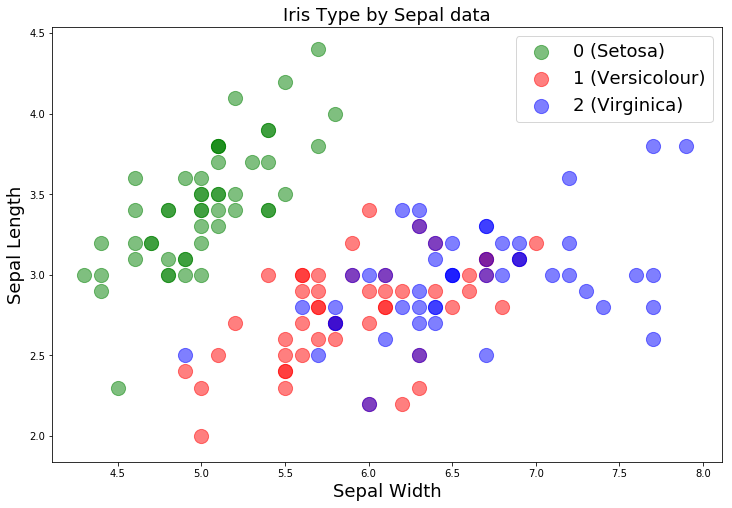

In [59]:
sep_len = X[:,0]
sep_wid = X[:,1]

plt.figure(figsize=(12,8))
colors = ['green', 'red', 'blue']
handles = []
for i in range(3):
    handle = plt.scatter(sep_len[y==i], sep_wid[y==i], c=colors[i], alpha=0.5, s=200)
    handles.append(handle)
plt.ylabel("Sepal Length",fontsize=18)
plt.xlabel("Sepal Width",fontsize=18)
plt.title('Iris Type by Sepal data', fontsize=18)
plt.legend(handles, ("0 (Setosa)", "1 (Versicolour)", "2 (Virginica)"), fontsize=18)
plt.show()

### Questions
1. Why are the points arranged in a grid-like fashion?
2. Based on the distribution in the scatter-plot, which class might be the easiest to predict using sepal info, and why?
3. Which class(es) might be the hardest to predict, and why?

This is pretty much identical to the example you saw in the lecture, just to show you how it works:

In [60]:
class NearestNeighbour:
    def __init__(self):
        pass
    
    def train(self, X, y):
        # simply just remembers all the training data, complexity: O(1)
        self.X = X
        self.y = y
        
    def predict(self, X):
        # same algorithm as seen in the lecture, implements k-Nearest Neighbour for k=1
        num_test = X.shape[0]
        
        # output type matching input type
        Ypred = np.zeros(num_test, dtype=self.y.dtype)
        
        for i in range(num_test):
            # finds the Euclidean distance between the point to predict and all trained points
            distances = np.sum(np.square(self.X - X[i,:]), axis=1)
            
            # gets the index with the min distance (i.e. the closest point) for each point to predict
            min_index = np.argmin(distances)
            
            # gets the class of the closest point
            Ypred[i] = self.y[min_index]
            
        return Ypred

In [61]:
# setting up an instance of the NearestNeighbour class
nn = NearestNeighbour

# training the data
NearestNeighbour.train(nn, X_train, y_train)

# testing the data
predictions = NearestNeighbour.predict(nn, X_test)

We can look at the data visually so we can see at a glance whether we're on the right track. Then we'll use a "confusion matrix", which just compares the actual class with the class we predicted - great for showing us where we went wrong, and if we're biased towards one class.

In [62]:
# compare visually
print(predictions)
print(y_test)

[0. 1. 0. 1. 0. 1. 1. 0. 0. 2. 0. 2. 1. 0. 1. 1. 1. 2. 1. 0. 0. 1. 1. 2.
 1. 2. 1. 2. 1. 0.]
[0. 2. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 2. 0. 0. 2. 1. 2.
 1. 2. 2. 1. 2. 0.]


In [63]:
# the confusion matrix lets us see how many we got right, and where we went wrong
metrics.confusion_matrix(y_test, predictions)

array([[10,  0,  0],
       [ 0,  9,  4],
       [ 0,  5,  2]])

That is, we guessed Class 0 correctly 10/10 times, Class 1 correctly 9/13 times, and Class 2 correctly 2/7 times.<br>
But we also thought 5 of the Class 2s were Class 1, and we thought 4 of the Class 1s were Class 2!<br><br>
Now let's try out for k-Nearest Neighbour, and see if we can improve.

In [64]:
class kNearestNeighbour:
    def __init__(self):
        pass
    
    def train(self, X, y):
        # simply just remembers all the training data, complexity: O(1)
        self.X = X
        self.y = y
        
    def predict(self, X, k):
        # same algorithm as seen in the lecture, implements k-Nearest Neighbour for k=1
        num_test = X.shape[0]
        
        # output type matching input type
        Ypred = np.zeros(num_test, dtype=self.y.dtype)
        
        for i in range(num_test):
            # finds the Euclidean distance between the point to predict and all trained points
            distances = np.sum(np.square(self.X - X[i,:]), axis=1)
            
            # gets the index with the min distance (i.e. the closest point) for each point to preict
            min_index = np.argsort(distances)[:k]
            
            # gets the class of the closest point
            k_classes = self.y[min_index]
            Ypred[i] = stats.mode(k_classes).mode
            
        return Ypred

In [69]:
# setting up an instance of the NearestNeighbour class
knn = kNearestNeighbour

# training the data
kNearestNeighbour.train(knn, X_train, y_train)

# testing the data
predictions = kNearestNeighbour.predict(knn, X_test, 7)
help(np.argmin)


Help on function argmin in module numpy.core.fromnumeric:

argmin(a, axis=None, out=None)
    Returns the indices of the minimum values along an axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        By default, the index is into the flattened array, otherwise
        along the specified axis.
    out : array, optional
        If provided, the result will be inserted into this array. It should
        be of the appropriate shape and dtype.
    
    Returns
    -------
    index_array : ndarray of ints
        Array of indices into the array. It has the same shape as `a.shape`
        with the dimension along `axis` removed.
    
    See Also
    --------
    ndarray.argmin, argmax
    amin : The minimum value along a given axis.
    unravel_index : Convert a flat index into an index tuple.
    
    Notes
    -----
    In case of multiple occurrences of the minimum values, the indices
    corresponding to the first occurrence ar

In [66]:
# compare visually
print(predictions)
print(y_test)

[0. 2. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 2. 1. 2. 2. 1. 0. 0. 1. 1. 2.
 1. 2. 2. 2. 2. 0.]
[0. 2. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 2. 0. 0. 2. 1. 2.
 1. 2. 2. 1. 2. 0.]


In [67]:
# the confusion matrix lets us see how many we got right, and where we went wrong
metrics.confusion_matrix(y_test, predictions)

array([[10,  0,  0],
       [ 0,  9,  4],
       [ 0,  2,  5]])

That is, we guessed Class 0 correctly 10/10 times, Class 1 correctly 9/13 times, and Class 2 correctly 6/7 times.<br>
But we also thought 1 of the Class 2s were Class 1, and we thought 4 of the Class 1s were Class 2. This is a little better than k=1 Nearest Neighbours though!